# Image Classification of a Dog and Cat

## Importing the Packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'C:/Users/ovied/OneDrive/Desktop/dataset/training_set'
        ,target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'C:/Users/ovied/OneDrive/Desktop/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary') 

Found 2000 images belonging to 2 classes.


## Building and Training the CNN


In [4]:
cnn = tf.keras.models.Sequential()     #Creating the Model

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, activation='relu', input_shape= [64,64,3])) #First cnn layer

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2))  #appling max pooling to the CNN layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, activation='relu'))  #Second cnn layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2))  #appling max pooling to the cnn

In [8]:
cnn.add(tf.keras.layers.Flatten())   #flattening the pooled feature map

In [9]:
cnn.add(tf.keras.layers.Dense(units= 150, activation= 'relu'))  #adding the fully connected layer to the cnn

In [10]:
cnn.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid')) #adding the output layer to the CNN

In [11]:
cnn.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=  ['accuracy']) #compiling the CNN

In [12]:
history = cnn.fit(x = training_set, validation_data= test_set, epochs = 25) #training and evaluating the CNN

Epoch 1/25
250/250 [==============================] - 43s 170ms/step - loss: 0.6853 - accuracy: 0.5599 - val_loss: 0.6317 - val_accuracy: 0.6435
Epoch 2/25
250/250 [==============================] - 45s 179ms/step - loss: 0.6117 - accuracy: 0.6651 - val_loss: 0.5978 - val_accuracy: 0.6790
Epoch 3/25
250/250 [==============================] - 43s 171ms/step - loss: 0.5795 - accuracy: 0.6942 - val_loss: 0.5411 - val_accuracy: 0.7250
Epoch 4/25
250/250 [==============================] - 42s 169ms/step - loss: 0.5475 - accuracy: 0.7179 - val_loss: 0.5159 - val_accuracy: 0.7515
Epoch 5/25
250/250 [==============================] - 40s 161ms/step - loss: 0.5158 - accuracy: 0.7473 - val_loss: 0.5061 - val_accuracy: 0.7520
Epoch 6/25
250/250 [==============================] - 40s 162ms/step - loss: 0.5007 - accuracy: 0.7561 - val_loss: 0.4942 - val_accuracy: 0.7670
Epoch 7/25
250/250 [==============================] - 40s 161ms/step - loss: 0.4845 - accuracy: 0.7676 - val_loss: 0.4783 - val_ac

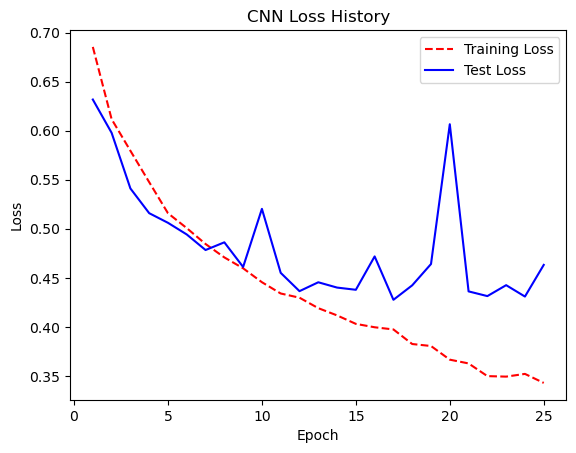

In [19]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('CNN Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

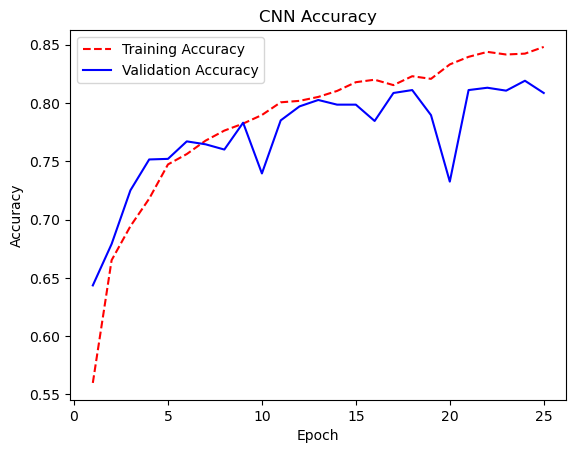

In [20]:
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## Predicting Images

### These are the three prediction images that will be used on the CNN

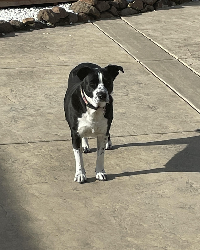

In [30]:
image1 = image.load_img('C:/Users/ovied/OneDrive/Desktop/luna.jpg', target_size =(250, 200))
image2 = image.load_img('C:/Users/ovied/OneDrive/Desktop/dataset/single_prediction/cat_or_dog_1.jpg', target_size =(250, 200))
image3 = image.load_img('C:/Users/ovied/OneDrive/Desktop/dataset/single_prediction/cat_or_dog_2.jpg', target_size =(250, 200))
image1

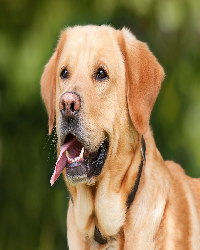

In [28]:
image2

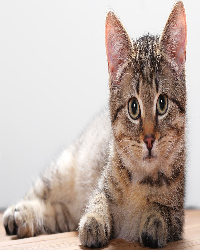

In [29]:
image3

In [35]:
import keras.utils as image

#loading the image with the same size the CNN was trained on
test_image = image.load_img('C:/Users/ovied/OneDrive/Desktop/luna.jpg', target_size =(64, 64))
test_image = image.img_to_array(test_image) #conveting the image into an array
test_image = np.expand_dims(test_image, axis = 0) #CNN was trained with batch so single prediction needs to be in a batch
result = cnn.predict(test_image/255.0) #predicting the normalized image 
training_set.class_indices
if result[0][0] > 0.5:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print(prediction)

1/1 [==============================] - 0s 12ms/step
Dog


In [36]:
#loading the image with the same size the CNN was trained on
test_image = image.load_img('C:/Users/ovied/OneDrive/Desktop/dataset/single_prediction/cat_or_dog_1.jpg', target_size =(64, 64))
test_image = image.img_to_array(test_image) #conveting the image into an array
test_image = np.expand_dims(test_image, axis = 0) #CNN was trained with batch so single prediction needs to be in a batch
result = cnn.predict(test_image/255.0) #predicting the normalized image 
training_set.class_indices
if result[0][0] > 0.5:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print(prediction)

1/1 [==============================] - 0s 14ms/step
Dog


In [37]:
#loading the image with the same size the CNN was trained on
test_image = image.load_img('C:/Users/ovied/OneDrive/Desktop/dataset/single_prediction/cat_or_dog_2.jpg', target_size =(64, 64))
test_image = image.img_to_array(test_image) #conveting the image into an array
test_image = np.expand_dims(test_image, axis = 0) #CNN was trained with batch so single prediction needs to be in a batch
result = cnn.predict(test_image/255.0) #predicting the normalized image 
training_set.class_indices
if result[0][0] > 0.5:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print(prediction)

1/1 [==============================] - 0s 13ms/step
Cat


We can see that our CNN was able to predict all three images correctly 